In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
J = -0.5
H = -0.01
T = 2
Lattice_length = 20
random_init = np.random.randint(0, 2,(Lattice_length,Lattice_length))
random_init = 2 * random_init - 1

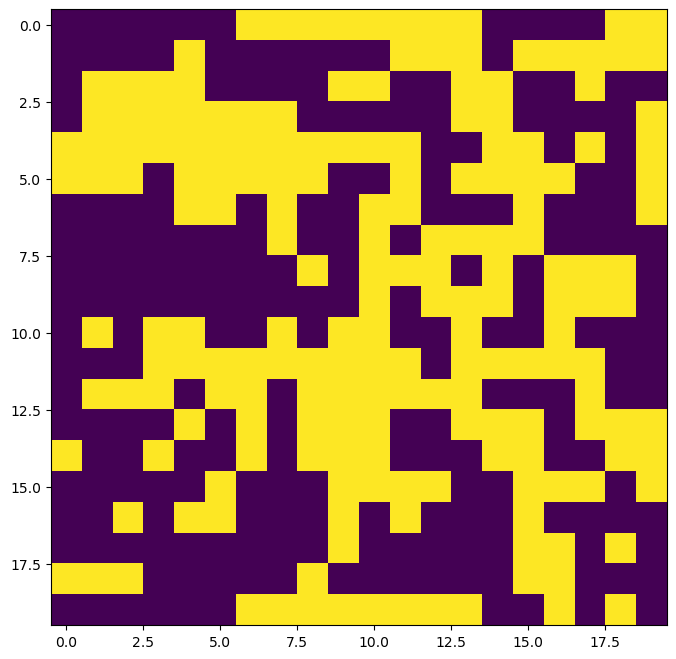

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(random_init)

In [4]:
def Metropolis(minit_random,mT):
    monte_carlo_magnetization = 0
    monte_carlo_correlations = np.empty((Lattice_length,Lattice_length))
    step = 10000
    ignore_step = 1000
    for i_step in range(step):
        for x in range(Lattice_length):
            for y in range(Lattice_length):
                S_I = minit_random[x][y]
                S_UP = minit_random[x][(y+1)%Lattice_length]
                S_DOWN = minit_random[x][y-1]
                S_RIGHT = minit_random[(x+1)%Lattice_length][y]
                S_LEFT = minit_random[x-1][y]
                delta_E = -2*(S_I*S_UP+S_I*S_DOWN+S_I*S_RIGHT+S_I*S_LEFT)*J/mT - 2*S_I*H/mT
                if(delta_E <= 0 or np.exp(-delta_E) > np.random.random()):
                    minit_random[x][y] = -S_I
        if(i_step > ignore_step):
            monte_carlo_magnetization += np.mean(minit_random)
            for k in range(Lattice_length):
                for m in range(Lattice_length):
                    monte_carlo_correlations[k][m] += minit_random[k][m]*minit_random[Lattice_length//2][Lattice_length//2]
    return monte_carlo_magnetization/(step-ignore_step),monte_carlo_correlations/(step - ignore_step)

In [5]:
monte_carlo_magnet,monte_carlo_corre = Metropolis(random_init,T)

In [6]:
monte_carlo_magnet

0.02258833333333321

Text(95.72222222222221, 0.5, 'Spin Index')

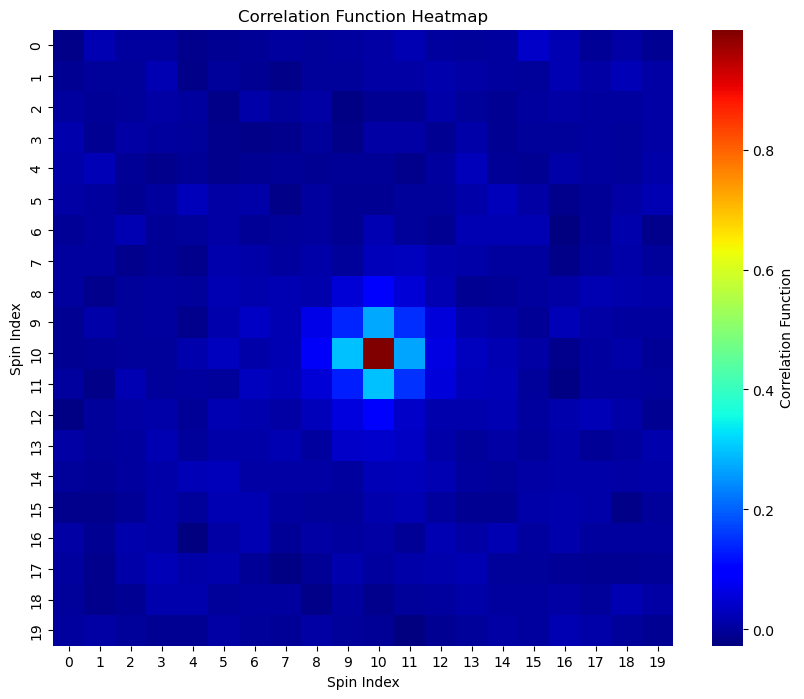

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(monte_carlo_corre, cmap='jet', annot=False, fmt=".2f", cbar_kws={'label': 'Correlation Function'})
plt.title('Correlation Function Heatmap')
plt.xlabel('Spin Index')
plt.ylabel('Spin Index')

# Magnetization and Critical Point

In [9]:
def Metropolis2(minit_random,mT):
    monte_carlo_magnetization = 0
    step = 10000
    ignore_step = 1000
    for i_step in range(step):
        for x in range(Lattice_length):
            for y in range(Lattice_length):
                S_I = minit_random[x][y]
                S_UP = minit_random[x][(y+1)%Lattice_length]
                S_DOWN = minit_random[x][y-1]
                S_RIGHT = minit_random[(x+1)%Lattice_length][y]
                S_LEFT = minit_random[x-1][y]
                delta_E = -2*(S_I*S_UP+S_I*S_DOWN+S_I*S_RIGHT+S_I*S_LEFT)*J/mT - 2*S_I*H/mT
                if(delta_E <= 0 or np.exp(-delta_E) > np.random.random()):
                    minit_random[x][y] = -S_I
        if(i_step > ignore_step):
            monte_carlo_magnetization += np.mean(minit_random)
    return monte_carlo_magnetization/(step-ignore_step)

In [18]:
temperature = np.arange(0.1, 2, 0.1)
magnetization_n = np.zeros(len(temperature))
magnetization_p = np.zeros(len(temperature))


init_random = np.random.random((Lattice_length,Lattice_length))
lattice_n = np.zeros((Lattice_length, Lattice_length))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1


init_random = np.random.random((Lattice_length,Lattice_length))
lattice_p = np.zeros((Lattice_length, Lattice_length))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1


for i in range(len(temperature)):
    random_temp_n = lattice_n.copy()
    random_temp_p = lattice_p.copy()
    magnetization_n[i] = Metropolis2(random_temp_n,temperature[i])
    magnetization_p[i] = Metropolis2(random_temp_p,temperature[i])

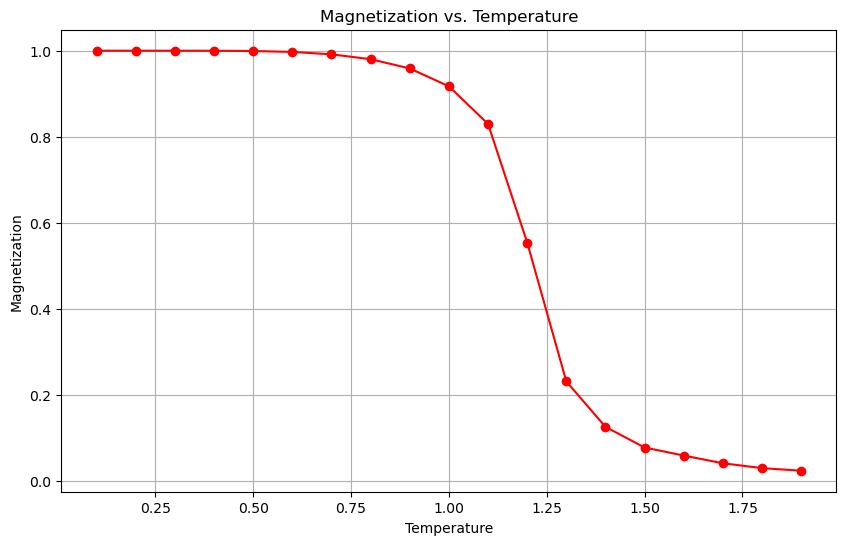

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(temperature, magnetization_p, 'ro-')
#plt.plot(temperature,magnetization_n, 'bo-')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs. Temperature')
plt.grid(True)
plt.show()